### Lecture 1 Orientation to SQL on big data

#### Learning ojectives
- use HUE to execute SQL statements
- use SQL utility commands to explore and navigate databases and tables
- provide some examples of interfaces other thant HUE


Running SQL utility statements
```MySQL
SHOW DATABASES;
USE databasenames;
SHOW TABLES;
DESCRIBE tablename;
```

Running SQL **SELECT** statements
```MySQL
SELECT * from tablename;
```
The order of rows of your query might vary; The order of columns is determined.

Command-line interface (CLI) tools:
- beeline (Hive, JDBC)
- Impala Shell

Using beeline
```shell
$ beeline -h
$ beeline -u jdbc:hive2://localhost:10000 -n training -p training
> SHOW DATABASES;
> USE fun;
> !q
```

Using Impala Shell <br>
`-h` for help <br>
`-d` for database
```shell
$ impala-shell -h
$ impala-shell -d fun
> SHOW TABLES;
> SELECT * FROM games;
> quit;
```

### Lecture 2 SQL SELECT essentials
Using SELECT statements to do analytics and answer different kinds of questions

Learning objectives
- construct working SELECT statements as a foundation for more advanced statements;
- write expanded SELECT statements that include expressions and functions;
- use the FROM clause to specify the table from which the SELECT statement retrieves data;
- identify rules and conventions regarding keywords and identifiers in SQL.


#### SQL building block
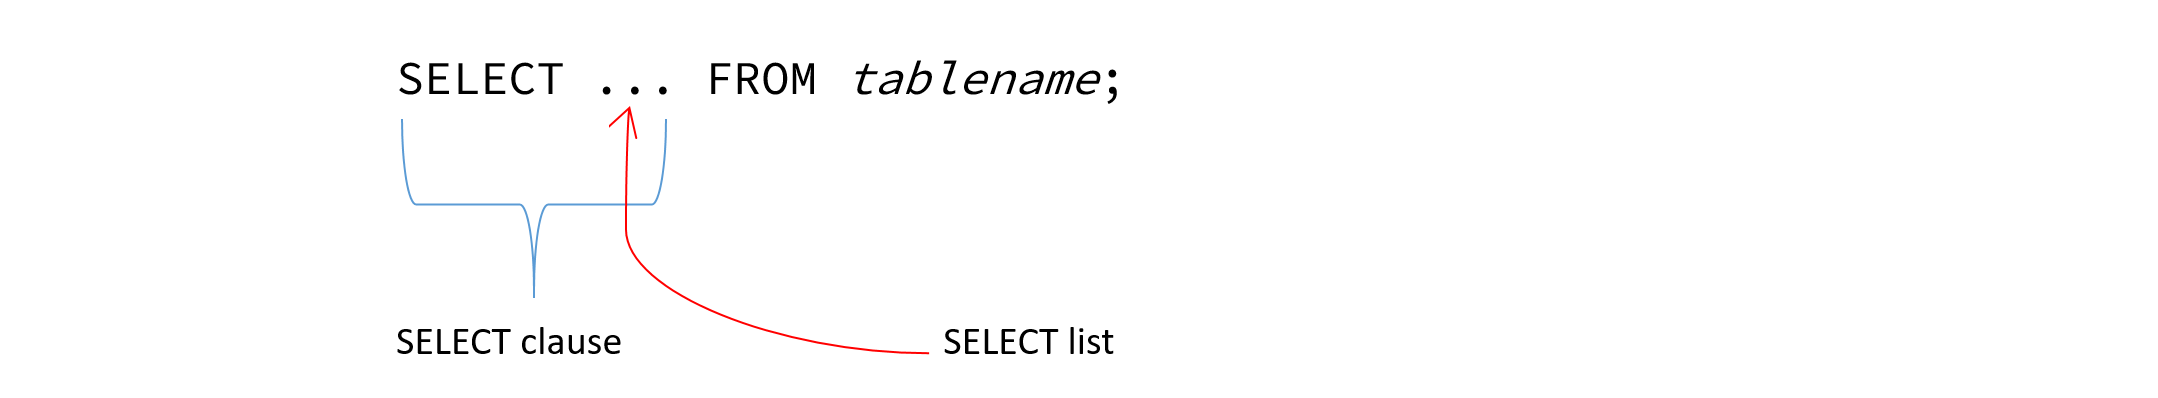
```MySQL
SELECT ...
  FROM ...
  WHERE ...
  GROUP BY ...
  HAVING ...
  ORDER BY ...
  LIMIT ...;
```

Examples
```MySQL
SELECT * FROM games;
SELECT name, `year`, inventor FROM games -- select columns references;
SELECT 42 -- select literal value;
SELECT 'foo', 'bar' -- select literal string;
SELECT 'Board Game', name, list_price FROM games;
```



#### Expressions are composed of: 
- literal values;
- comlumns references;
- operators;
- functions.

Examples
```MySQL
SELECT name, list_price + 5 FROM games;
SELECT name, round(list_price) FROM games -- round to whole number;
SELECT name, -list_price FROM games;
SELECT 5 / 2;
```

- +: addition (can be unary or binary)
- -: subtraction (can be unary or binary)
- *: multiplication
- /: division (5 / 2 = 2.5 in Hive, Impala, and MySQL)
- %: modulo


#### Column aliases

```MySQL
SELECT 
    name,
    5 AS shipping_fee,
    list_price + 5 AS price_with_shipping_fee
  FROM
    games;
```
You should only use letters, digits, and underscores in column aliases;
You should not use SQL key words in column aliases.


#### Built-in functions
Function names are ususlly not case sensitive, and by convention, we write them in all lower case.

```MySQL
SELECT round(19.37);
SELECT round(19.37, 1);
SELECT 5 / 2;
SELECT floor(19.37);
SELECT ceil(19.37);
```

Common string functions

- `length(str)`
- `reverse(str)`
- `trim(str), ltrim(str), rtrim(str)`<br>
   These remove whitespaces at the ends of the argument `str`.
- `lpad(str, n, padstr), rpad(str, n, padstr)` <br>
   `lpad('.50', 4, '0') = '0.50'` <br>
   `rpad('0.5', 4, '0') = '0.50'` <br>
   `rpad('Common', 17, 'String') = 'Common String'`
- `substring(str, index, max_length)`
- `concat(str1, str2[, str3, ...]), concat_ws(sep, str1, str2[, str3, ...]`


#### Data type conversion (casting)
- Implict casting (supported in Hive)
```MySQL
SELECT concat(name, ' is for players age', min_age, ' or older'
  FROM games;
```
- Explict castring (Impala doesn't support implict casting)
```MySQL
SELECT concat(name, ' is for players age', cast(min_age AS STRING), ' or older'
  FROM games;
```

#### The `DISTINCT` keyword

Use `DISTINCT` keyword in select list to omit duplication.

```MySQL
SELECT DISTINCT min_age FROM games;
SELECT DISTINCT min_players FROM games;
SELECT DISTINCT min_age, max_players 
FROM games -- distinct combinations;
SELECT DISTINCT * FROM games -- distinct rows;
SELECT DINSTINCT
    concat(substring(year, 1, 3), "0s")
  FROM games -- distinct decades;
```
In SQL, the opposite of `DISTINCT` is ALL.


#### The `FROM` clause
The `FROM` clause specifies which table the data you're querying should come from.

```MySQL
SELECT select_list FROM table_reference;
```

Qualified form of table reference
```MySQL
SELECT select_list FROM databasename.tablename;
```

#### Identifiers

The database names and table names you use in the FROM clause are types of identifiers. The column reference is used in the select list are also identifiers. Column Aliases are also identifiers. Identifiers are case insensitive.
- letters, digits, underscores
- letter for first character
- lowercase letters
- max length varies

Reserved words cannot be identifiers. 
- `FROM`
- `AS`
- `DISTINCT`
- `SHOW`
- `USE`
- ...

Impala reserved words: http://tiny.cloudera.com/impala-reversed-words <br>
Hive reserved words: http://tiny.cloudera.com/hive-reversed-words

```MySQL
USE "use" -- PostgreSQL;
USE `use` -- Hive, Impala, Presto, Drill, MySQL;

USE `use`;
SELECT `select` AS `as` FROM `from` -- a terrible choice;
```

Hive allows you to put `FROM` before `SELECT`
```MySQL
FROM fun.games SELECT name;
```

#### Using Beeline and Impala Shell in Non-interactive Mode
Interactive
- start tool, enter statements at prompt
- exit manually

Non-interactive / batch
- start tool with statements to run
- exit automatically

##### beeline
Run Hive queries directly from the command line using the `-e` option

```shell
$ beeline -u jdbc:hive2://localhost:10000 -e 'SELECT * FROM fun.games'
```
Execute a file containing HiveQL code using the `-f` option

```shell
$ beeline -u ... -f myquery.sql
```

Use the --silent=true option to suppress informational messages
```shell
$ beeline --silent==true -u ...
```
##### implala-shell

Run Impala queries directly form command line using the -q option
```shell
$ impala-shell -q 'SELECT * FROM fun.games'
```

Execute a file containing queries using the -f option
```shell
$ impala-shell -f myquery.sql
```

Use --quiet to suppress informational messages
```shell
$ impala-shell --quiet -f myquery.sql
```

Hive doesn't support multi-line comments; Impala does.

```MySQL
SELECT name, year FROM fun.games;
/* The above displays game and year invented. 
This multi-line comment is Impala only */
```

Formatting the output of Beeline and Impala shell
##### beeline
- Change output format (关掉 pretty print) using `--outputformat=`
- csv2 for comma delimited
- tsc2 for tab delimited
```shell
$ beeline -u ... --outputformat=csv2 -e 'SELECT * FROM fun.games'
```

- Exclude header using --showHeader=false
```shell
$ beeline -u ... --showHeader=false -e 'SELECT * FROM fun.games'
```

##### impala-shell
- Change output format using `--delimited`
- tab is the default delimiter
- specify other delimiter using `--output_delimiter`
```shell
$ impala-shell --delimited --output_delimiter=',' \
-q 'SELECT * FROM fun.games'
```

 Header excluded by default when using --delimited
- Use `--print`_header to include it
```shell
$ impala-shell --delimited --output_delimiter=',' --print_header \
-q 'SELECT * FROM fun.games'
```









